<a href="https://colab.research.google.com/github/mary-ts/Neural-Computing/blob/mary/xception%3F%3F%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.layers as layers
from keras import Sequential
import keras.models
from keras.layers import *
from keras.models import * 
from keras import optimizers, applications
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping

Dataset Paths

In [ ]:
train_path = "/content/drive/MyDrive/CNN IMAGES/Fruit_dataset/MY_data/train"
test_path = "/content/drive/MyDrive/CNN IMAGES/Fruit_dataset/MY_data/test"
val_path = "/content/drive/MyDrive/CNN IMAGES/Fruit_dataset/MY_data/predict"

Creating training and test data

In [ ]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
test_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

val_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

Importing data into generators

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'categorical', 
    shuffle=True)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 8,
    shuffle=True,
    class_mode = 'categorical')

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'categorical')

Found 2301 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.
Found 48 images belonging to 10 classes.


Xception Model

In [ ]:
model = applications.Xception(weights='imagenet', 
                              include_top=False, 
                              input_shape=(224, 224, 3))

for layer in model.layers[:-5]:
    layer.trainable = False

x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(.3)(x)
predictions = Dense(10, activation="softmax")(x)
model_final = Model(model.input, predictions)

model_final.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
#model_final.summary()

83683744/83683744 [==============================] - 0s 0us/step


Xception


In [ ]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
#early = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=7, verbose=2, mode='auto')
hist = model_final.fit_generator(generator=train_generator,                   
                                    steps_per_epoch=150,
                                    validation_data=test_generator,                    
                                    validation_steps=10,
                                    epochs=25,
                                    callbacks = [checkpoint],
                                    verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/25

Epoch 1: val_loss improved from inf to 2.30260, saving model to vgg16_1.h5
150/150 - 482s - loss: 2.9159 - accuracy: 0.1495 - val_loss: 2.3026 - val_accuracy: 0.1125 - 482s/epoch - 3s/step
Epoch 2/25

Epoch 2: val_loss did not improve from 2.30260
150/150 - 461s - loss: 2.3146 - accuracy: 0.2233 - val_loss: 2.4358 - val_accuracy: 0.1750 - 461s/epoch - 3s/step
Epoch 3/25

Epoch 3: val_loss did not improve from 2.30260
150/150 - 447s - loss: 2.2885 - accuracy: 0.2492 - val_loss: 2.3497 - val_accuracy: 0.2500 - 447s/epoch - 3s/step
Epoch 4/25

Epoch 4: val_loss improved from 2.30260 to 2.01718, saving model to vgg16_1.h5
150/150 - 452s - loss: 2.1712 - accuracy: 0.2800 - val_loss: 2.0172 - val_accuracy: 0.3125 - 452s/epoch - 3s/step
Epoch 5/25

Epoch 5: val_loss did not improve from 2.01718
150/150 - 445s - loss: 2.1516 - accuracy: 0.3167 - val_loss: 2.1841 - val_accuracy: 0.2750 - 445s/epoch - 3s/step
Epoch 6/25

Epoch 6: val_loss did not improve from 2.01718
150/150 - 435s -

Plot Xception

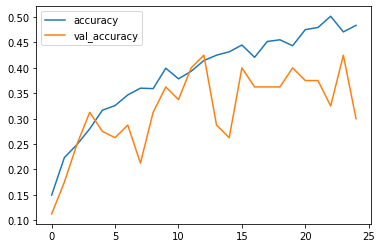

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(hist.history["loss"])
plt.plot(hist.history["accuracy"])
#plt.plot(hist.history["val_loss"])
plt.plot(hist.history["val_accuracy"])
plt.legend(["accuracy", "val_accuracy"])
plt.show()